In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("./../data/raw/train_data.csv")
df.head()

,ID,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,37765,15794860,Ch'eng,627,France,Male,28.0,7,131694.04,1,1.0,1.0,161205.61,0
1,130453,15728005,Hargreaves,597,France,Male,34.0,2,0.00,2,0.0,1.0,181419.29,0
2,77297,15686810,Ts'ui,724,France,Male,39.0,7,0.00,2,1.0,1.0,100862.54,0
3,40858,15760244,Trevisano,663,Germany,Female,56.0,5,118577.24,3,1.0,0.0,61164.45,1
4,19804,15810563,French,627,France,Female,33.0,5,0.00,2,1.0,1.0,103737.82,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143579 entries, 0 to 143578
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               143579 non-null  int64  
 1   CustomerId       143579 non-null  int64  
 2   Surname          143579 non-null  object 
 3   CreditScore      143579 non-null  int64  
 4   Geography        143579 non-null  object 
 5   Gender           143579 non-null  object 
 6   Age              143579 non-null  float64
 7   Tenure           143579 non-null  int64  
 8   Balance          143579 non-null  float64
 9   NumOfProducts    143579 non-null  int64  
 10  HasCrCard        143579 non-null  float64
 11  IsActiveMember   143579 non-null  float64
 12  EstimatedSalary  143579 non-null  float64
 13  Exited           143579 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 15.3+ MB


- There arent missing values

In [6]:
df.describe()

,ID,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,143579.000000,1.435790e+05,143579.000000,143579.000000,143579.000000,143579.000000,143579.000000,143579.000000,143579.000000,143579.000000,143579.000000
mean,82521.171097,1.569202e+07,656.411704,38.144476,5.018408,55533.640642,1.553932,0.754107,0.496800,112530.072465,0.212078
std,47650.353367,7.142049e+04,80.210361,8.871711,2.807027,62822.616346,0.546754,0.430617,0.499991,50301.718378,0.408781
min,0.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41259.500000,1.563299e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74580.800000,0.000000
50%,82485.000000,1.569018e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117931.100000,0.000000
75%,123793.500000,1.575685e+07,710.000000,42.000000,7.000000,119948.090000,2.000000,1.000000,1.000000,155149.685000,0.000000
max,165033.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


# Univariate analysis

## Target: Exited

In [7]:
print("Proportion of people who exited the bank (1) and those that stay (0)")
round(df.Exited.value_counts(normalize=True), 2)

Proportion of people who exited the bank (1) and those that stay (0)


Exited
0    0.79
1    0.21
Name: proportion, dtype: float64

## Discrete variables: HasCrCard, NumOfProducts

HasCrCard
1.0    0.754107
0.0    0.245893
Name: proportion, dtype: float64

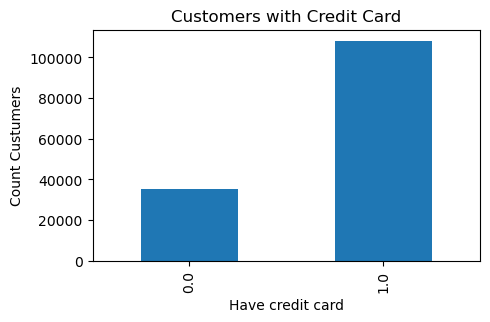

In [8]:
df.HasCrCard.value_counts().sort_index().plot(
    kind="bar",
    title="Customers with Credit Card",
    xlabel="Have credit card",
    ylabel="Count Custumers",
    figsize=(5, 3),
)
df.HasCrCard.value_counts(normalize=True)

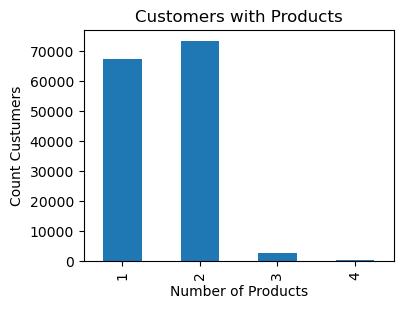

% of clients having Bank products
NumOfProducts
1    46.917725
2    51.052731
3     1.748167
4     0.281378
Name: proportion, dtype: float64


In [9]:
df.NumOfProducts.value_counts().sort_index().plot(
    kind="bar",
    title="Customers with Products",
    xlabel="Number of Products",
    ylabel="Count Custumers",
    figsize=(4, 3),
)

plt.show()
print("% of clients having Bank products")
print(df.NumOfProducts.value_counts(normalize=True).sort_index() * 100)

- 51% of custumers has 2 products
- Only 0.28% of custumer has 4 products

## Discrete variables: Geographie, Gender, isActiveMember

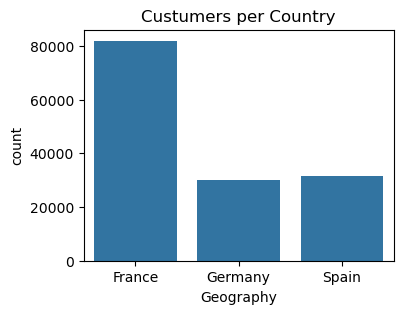

% of Clients per Country Geography
France     0.57
Spain      0.22
Germany    0.21
Name: proportion, dtype: float64


In [10]:
plt.figure(figsize=(4, 3))
sns.countplot(df, x="Geography").set(title="Custumers per Country")
plt.show()
print("% of Clients per Country", round(df.Geography.value_counts(normalize=True), 2))

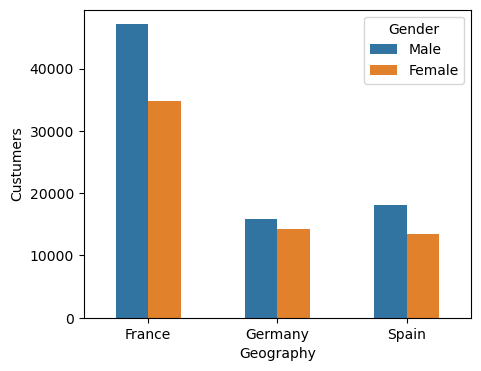

Geography  Gender
France     Male      0.575251
           Female    0.424749
Germany    Male      0.524498
           Female    0.475502
Spain      Male      0.572084
           Female    0.427916
Name: proportion, dtype: float64

In [11]:
plt.figure(figsize=(5, 4))
sns.countplot(df, x="Geography", width=0.5, hue="Gender")
plt.ylabel("Custumers")
plt.show()
df.groupby("Geography").Gender.value_counts(normalize=True)

- In all countries, there are more men custumers than women custumers

In [12]:
df.IsActiveMember.value_counts()

IsActiveMember
0.0    72249
1.0    71330
Name: count, dtype: int64

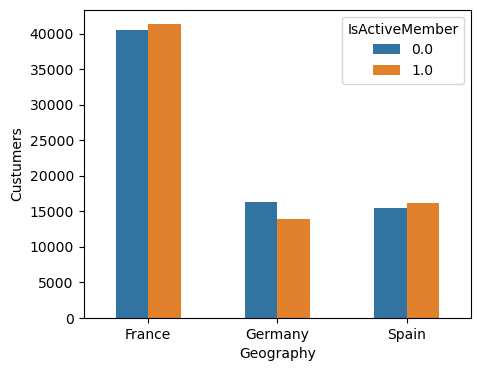

Geography  IsActiveMember
France     1.0               0.50
           0.0               0.50
Germany    0.0               0.54
           1.0               0.46
Spain      1.0               0.51
           0.0               0.49
Name: proportion, dtype: float64

In [13]:
plt.figure(figsize=(5, 4))
sns.countplot(df, x="Geography", width=0.5, hue="IsActiveMember")
plt.ylabel("Custumers")
plt.show()
round(df.groupby("Geography").IsActiveMember.value_counts(normalize=True), 2)

- In France and Spain, there are slightly more active custumers than inactive
- In Germany, 54% of custumers is Inactive

### Variable Age

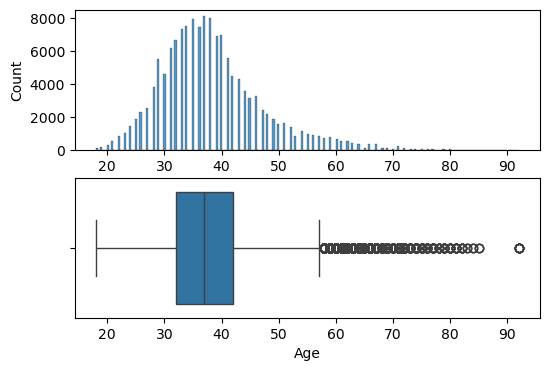

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(6, 4)
sns.histplot(df, x="Age", ax=axes[0])
sns.boxplot(df, x="Age", ax=axes[1])
plt.show()

In [15]:
df.Age.describe()

count    143579.000000
mean         38.144476
std           8.871711
min          18.000000
25%          32.000000
50%          37.000000
75%          42.000000
max          92.000000
Name: Age, dtype: float64

- The mean age of customers is 38 years old

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,113129.0,36.583765,8.166737,18.0,31.0,36.0,40.0,92.0
1,30450.0,43.942890,8.981339,18.0,38.0,44.0,50.0,92.0


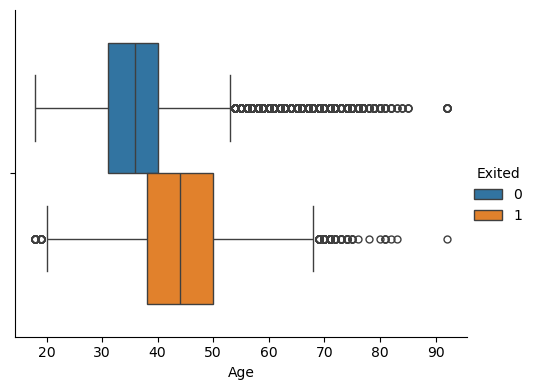

In [16]:
sns.catplot(df, x="Age", hue="Exited", kind="box", height=4, aspect=1.2)
df.groupby("Exited")["Age"].describe()

* Customer that exited the Bank in average, are younger than those who stayed.  36 versus 43 years old

## Multivariate analysis

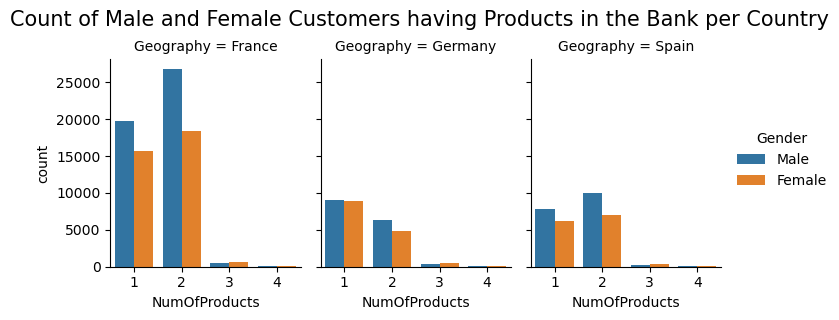

Gender                     Female      Male
Geography NumOfProducts                    
France    1              0.443249  0.556751
          2              0.406436  0.593564
          3              0.549460  0.450540
          4              0.604790  0.395210
Germany   1              0.495647  0.504353
          2              0.435644  0.564356
          3              0.547454  0.452546
          4              0.598837  0.401163
Spain     1              0.440735  0.559265
          2              0.412134  0.587866
          3              0.588015  0.411985
          4              0.507692  0.492308

In [17]:
g = sns.catplot(
    data=df,
    x="NumOfProducts",
    hue="Gender",
    col="Geography",
    kind="count",
    height=3,
    aspect=0.8,
)

# Adding a global title
g.figure.suptitle(
    "Count of Male and Female Customers having Products in the Bank per Country",
    fontsize=15,
    y=1.05,
)
plt.show()
# Displaying the proportions, per country, of men and women custumers with 1,2,3 and 4 products in the Bank
# This is different from crosstab, because it displays the % of men and women by Country and Number of Products
df.groupby(["Geography", "NumOfProducts"])["Gender"].value_counts(
    normalize=True
).to_frame().reset_index(level=2).pivot(columns="Gender", values="proportion")

- In general, the proportion of men customers acquiring 1-2 bank products are higher than women custumers in all countries
- In Germany, the proportion of male and female custumers having 1 product is equivalent (50-50%)
- More women have 3 and 4 products than men, in all countries

<b> Distribution of customers according to Geography, number of products and the gender

In [18]:
round(
    pd.crosstab(
        [df.Geography], [df.Gender, df.NumOfProducts], normalize=True, margins=True
    )
    * 100,
    1,
)

Gender        Female                  Male                    All
NumOfProducts      1     2    3    4     1     2    3    4       
Geography                                                        
France          11.0  12.8  0.4  0.1  13.8  18.6  0.3  0.0   57.0
Germany          6.2   3.4  0.3  0.1   6.3   4.4  0.3  0.0   21.0
Spain            4.3   4.9  0.2  0.0   5.4   7.0  0.2  0.0   22.0
All             21.4  21.0  1.0  0.2  25.5  30.0  0.8  0.1  100.0

- 57% of custumers are in France, 21% in Germany and 22% in Spain
- 30% of customers having 2 products are men
- 1.2% of custumers having between 3-4 products are women compared to 0.9% men custumers --> Could this influence the "Exited" value?

In [19]:
df.columns

Index(['ID', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [20]:
df_temp = df.sample(frac=0.1)
df_temp.shape[0]

14358

In [21]:
df.head()

,ID,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,37765,15794860,Ch'eng,627,France,Male,28.0,7,131694.04,1,1.0,1.0,161205.61,0
1,130453,15728005,Hargreaves,597,France,Male,34.0,2,0.00,2,0.0,1.0,181419.29,0
2,77297,15686810,Ts'ui,724,France,Male,39.0,7,0.00,2,1.0,1.0,100862.54,0
3,40858,15760244,Trevisano,663,Germany,Female,56.0,5,118577.24,3,1.0,0.0,61164.45,1
4,19804,15810563,French,627,France,Female,33.0,5,0.00,2,1.0,1.0,103737.82,0


In [ ]:
df["AgeRange"] = pd.cut(x=df["Age"], bins=9, labels=False)
df["AgeRangeLabel"] = pd.cut(x=df["Age"], bins=9)
df["SalaryRange"] = pd.cut(x=df["EstimatedSalary"] / 1000, bins=10)
df.head()

,ID,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeRange,AgeRangeLabel,SalaryRange
0,37765,15794860,Ch'eng,627,France,Male,28.0,7,131694.04,1,1.0,1.0,161205.61,0,1,"(26.222, 34.444]","(159.996, 179.994]"
1,130453,15728005,Hargreaves,597,France,Male,34.0,2,0.00,2,0.0,1.0,181419.29,0,1,"(26.222, 34.444]","(179.994, 199.992]"
2,77297,15686810,Ts'ui,724,France,Male,39.0,7,0.00,2,1.0,1.0,100862.54,0,2,"(34.444, 42.667]","(100.002, 120.0]"
3,40858,15760244,Trevisano,663,Germany,Female,56.0,5,118577.24,3,1.0,0.0,61164.45,1,4,"(50.889, 59.111]","(60.006, 80.004]"
4,19804,15810563,French,627,France,Female,33.0,5,0.00,2,1.0,1.0,103737.82,0,1,"(26.222, 34.444]","(100.002, 120.0]"


In [40]:
df.groupby('Exited').AgeRangeLabel.value_counts(normalize=True)

Exited  AgeRangeLabel   
0       (34.444, 42.667]    0.411026
        (26.222, 34.444]    0.358599
        (42.667, 50.889]    0.107019
        (17.926, 26.222]    0.068373
        (50.889, 59.111]    0.030982
        (59.111, 67.333]    0.017405
        (67.333, 75.556]    0.005480
        (75.556, 83.778]    0.000972
        (83.778, 92.0]      0.000141
1       (42.667, 50.889]    0.335829
        (34.444, 42.667]    0.292479
        (50.889, 59.111]    0.182102
        (26.222, 34.444]    0.117800
        (59.111, 67.333]    0.041346
        (17.926, 26.222]    0.024959
        (67.333, 75.556]    0.005189
        (75.556, 83.778]    0.000263
        (83.778, 92.0]      0.000033
Name: proportion, dtype: float64

<Figure size 600x400 with 0 Axes>

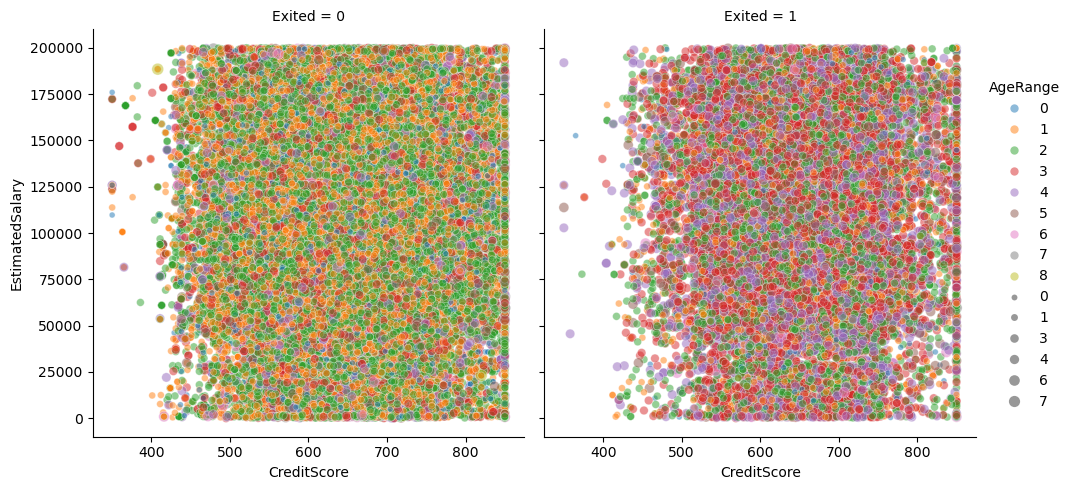

In [41]:
# sns.catplot(df_temp, x='Tenure', y='CreditScore', hue='Exited',  kind='swarm', col='Gender', height=4, aspect=1.2)
plt.figure(figsize=(6,4))
cmap = sns.cubehelix_palette(rot=-0.2, as_cmap=True)
sns.relplot(
    df,
    x="CreditScore",
    y="EstimatedSalary",
    col="Exited",
    hue="AgeRange",
    size="AgeRange",
    palette="tab10",
    alpha=0.5,
)

It seems that most of the customers that Exited correspond to the age range 42 to 50 years old

In [24]:
pd.crosstab(df.Gender, df.Exited)

Exited,0,1
Gender,,
Female,45038,17575
Male,68091,12875


- 17k woman custumers exited the bank compared to 12k men

In [25]:
df.groupby("Exited")["CreditScore"].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,113129.0,657.532136,79.899437,350.0,599.0,662.0,711.0,850.0
1,30450.0,652.249031,81.221163,350.0,593.0,651.0,709.0,850.0


In [26]:
df.groupby("Exited")["Tenure"].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,113129.0,5.046566,2.800191,0.0,3.0,5.0,7.0,10.0
1,30450.0,4.913793,2.829871,0.0,3.0,5.0,7.0,10.0


### Feature engineering

In [27]:
df.head()

,ID,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeRange,AgeRangeLabel,SalaryRange
0,37765,15794860,Ch'eng,627,France,Male,28.0,7,131694.04,1,1.0,1.0,161205.61,0,1,"(26.222, 34.444]","(159.996, 179.994]"
1,130453,15728005,Hargreaves,597,France,Male,34.0,2,0.00,2,0.0,1.0,181419.29,0,1,"(26.222, 34.444]","(179.994, 199.992]"
2,77297,15686810,Ts'ui,724,France,Male,39.0,7,0.00,2,1.0,1.0,100862.54,0,2,"(34.444, 42.667]","(100.002, 120.0]"
3,40858,15760244,Trevisano,663,Germany,Female,56.0,5,118577.24,3,1.0,0.0,61164.45,1,4,"(50.889, 59.111]","(60.006, 80.004]"
4,19804,15810563,French,627,France,Female,33.0,5,0.00,2,1.0,1.0,103737.82,0,1,"(26.222, 34.444]","(100.002, 120.0]"


In [28]:
cols = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]

df[cols].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,143579.000000,143579.000000,143579.000000,143579.000000,143579.000000,143579.000000
mean,656.411704,38.144476,5.018408,55533.640642,1.553932,112530.072465
std,80.210361,8.871711,2.807027,62822.616346,0.546754,50301.718378
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,74580.800000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,117931.100000
75%,710.000000,42.000000,7.000000,119948.090000,2.000000,155149.685000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


<Axes: >

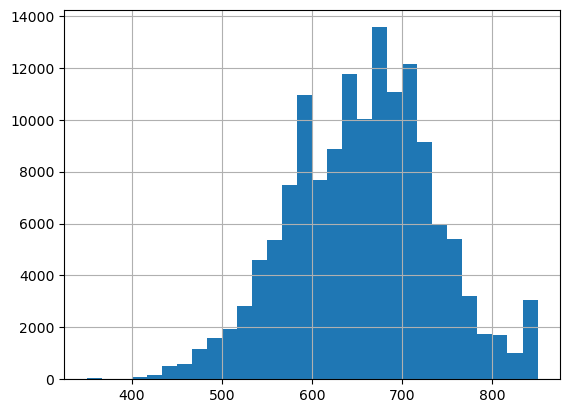

In [29]:
df.CreditScore.hist(bins=30)

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

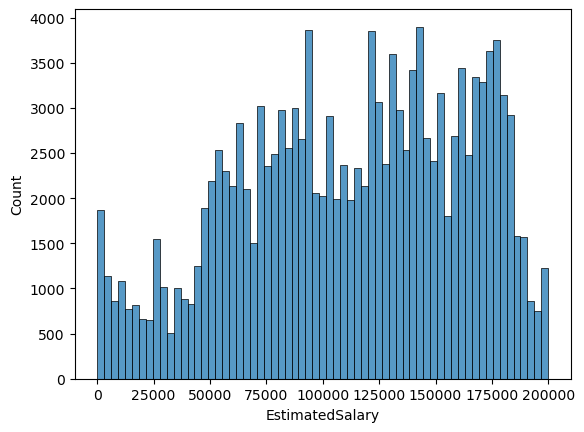

In [30]:
sns.histplot(df, x="EstimatedSalary")

<Axes: xlabel='CreditScore', ylabel='Count'>

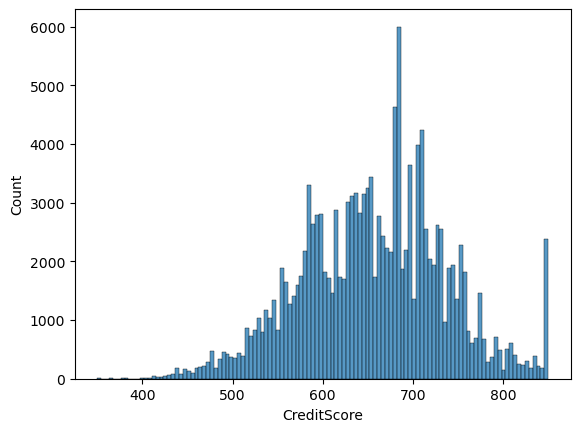

In [31]:
sns.histplot(df, x="CreditScore")